In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from numpy.linalg import norm
%matplotlib inline

In [2]:
data = pd.read_csv('./data/winequality-red.csv', sep=',')
data = data.drop_duplicates()
# copy the data
data_scaled = data.copy()
mean_data = data_scaled.mean()
std_data =  data_scaled.std()

# apply normalization techniques
for column in data_scaled.columns:
    if column!='MEDV':
        data_scaled[column] = (data_scaled[column] - mean_data[column]) / std_data[column]
    else : data_scaled[column] = (data_scaled[column] - mean_data[column]) / std_data[column]


df_label = data_scaled['quality']
df_features = data_scaled.drop(columns=['quality']) 

X_train, X_test, y_train, y_test = train_test_split(df_features, df_label, test_size=0.33, random_state=42, shuffle = True)

A_test = X_test.to_numpy() #training matrix
Y_test = y_test.to_numpy() #label matrix
A_train = X_train.to_numpy() #training matrix
Y_train = y_train.to_numpy() #label matrix
p = X_train.shape[1] #number of feature
n = X_train.shape[0] #nb of data point
#x0 = np.random.rand(p).T #random initial point 
x0 = np.zeros((p))

In [25]:
def HeavyBall(x0, A, y,beta, iterations = 100, learning_rate = 0.01, stopping_threshold = 1e-6):

    # Initializing learning rate and iterations
    loss = [] #to return 
    opt_dist = [] #to return
    vector=x0 #starting point 
    past_vector=x0.copy() #for x(t-1)
    n = X_train.shape[0] #nb of data point
    #optimal solution 
    sol_vector = np.linalg.solve(A.transpose().dot(A), A.transpose().dot(y))
    f_opt = A.dot(sol_vector)
    error_opt = y -f_opt 
    obj_opt = (1/(2*n))*(np.dot(error_opt.T,error_opt))
    
    # Estimation of optimal parameters
    for _ in range(iterations):
        # Calculating a new prediction
        prediction = A.dot(vector)
        #mean square error
        error = y - prediction 
        mse = (1/(2*n))*(np.dot(error.T,error))
        loss.append(mse)

        #calcultating gradient
        grad = -(A.transpose().dot(error))/n
        tmp=vector.copy()
        #gradient descent step
        vector = vector - (learning_rate * grad) + beta*(vector - past_vector)
        past_vector = tmp

        opt_dist.append(mse-obj_opt)
        # Printing the mse for each iteration
        #print(f"Iteration {i+1}: Cost {mse}")

    return vector, loss, opt_dist

In [26]:
def gradient_descent(x0, A, y, iterations = 100, learning_rate = 0.01, stopping_threshold = 1e-6):

    # Initializing learning rate and iterations
    loss = [] #to return 
    past_x = [] #to return
    opt_dist = []

    vector=x0 #starting point
    n = X_train.shape[0] #nb of data point
    #optimal solution 
    sol_vector = np.linalg.solve(A.transpose().dot(A), A.transpose().dot(y))
    f_opt = A.dot(sol_vector)
    error_opt = y -f_opt 
    obj_opt = (1/(2*n))*(np.dot(error_opt.T,error_opt))
    
    # Estimation of optimal parameters
    for _ in range(iterations):
        # Calculating a new prediction
        prediction = A.dot(vector)
        #mean square error
        error = y - prediction 
        mse = (1/(2*n))*(np.dot(error.T,error))
        loss.append(mse)

        #calcultating gradient
        grad = -(A.transpose().dot(error))/n

        #gradient descent step
        vector = vector - (learning_rate * grad)

        opt_dist.append(mse-obj_opt)
        # Printing the mse for each iteration
        #print(f"Iteration {i+1}: Cost {mse}")

    return vector, loss, opt_dist

Question 1 :

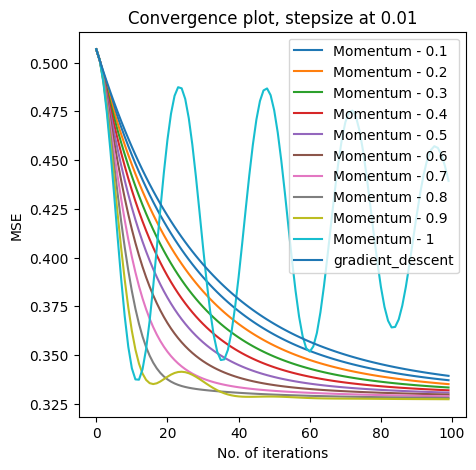

In [8]:
plt.figure(figsize=(7, 5))
x0 = np.zeros((p))
beta_mult = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for beta in beta_mult:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta)
    plt.plot(loss, label='Momentum - ' +str(beta))
final_x , loss, dist = gradient_descent(x0, A_train , Y_train)
plt.plot(loss, label='gradient_descent')
plt.title('Convergence plot, stepsize at 0.01')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

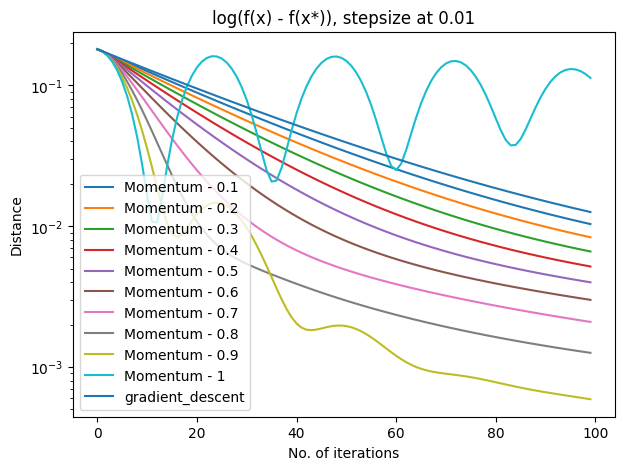

In [28]:
plt.figure(figsize=(7, 5))
x0 = np.zeros((p))
beta_mult = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for beta in beta_mult:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta)
    plt.semilogy(dist, label='Momentum - ' +str(beta))
final_x , loss, dist = gradient_descent(x0, A_train , Y_train)
plt.semilogy(dist, label='gradient_descent')
plt.title('log(f(x) - f(x*)), stepsize at 0.01')
plt.xlabel('No. of iterations')
plt.ylabel('Distance')
plt.legend()
plt.show()

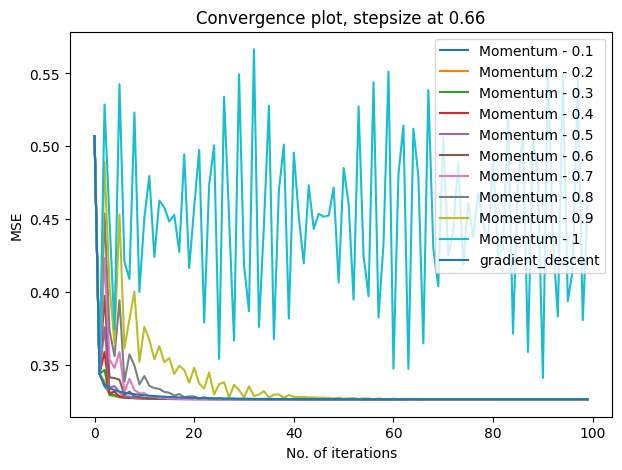

In [16]:
plt.figure(figsize=(7, 5))
x0 = np.zeros((p))
beta_mult = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for beta in beta_mult:
    final_x , loss = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.66)
    plt.plot(loss, label='Momentum - ' +str(beta))
final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.66)

plt.plot(loss, label='gradient_descent')
plt.title('Convergence plot, stepsize at 0.66')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

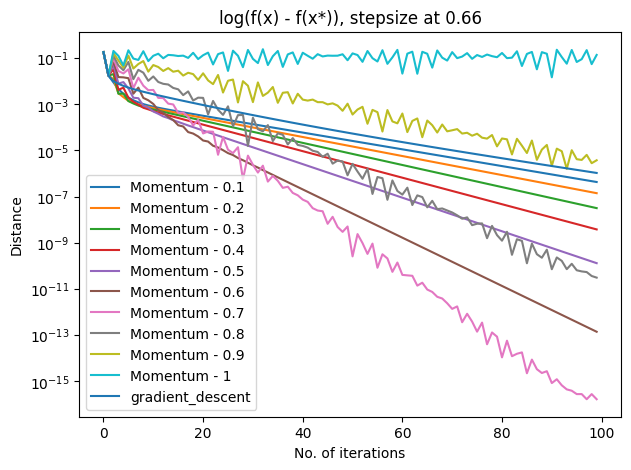

In [29]:
plt.figure(figsize=(7, 5))
x0 = np.zeros((p))
beta_mult = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for beta in beta_mult:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.66)
    plt.semilogy(dist, label='Momentum - ' +str(beta))
final_x , loss, dist = gradient_descent(x0, A_train , Y_train, learning_rate=0.66)
plt.semilogy(dist, label='gradient_descent')
plt.title('log(f(x) - f(x*)), stepsize at 0.66')
plt.xlabel('No. of iterations')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(7, 5))
x0 = np.zeros((p))
beta_mult = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for beta in beta_mult:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.66)
    plt.semilogy(dist, label='Momentum - ' +str(beta))
final_x , loss, dist = gradient_descent(x0, A_train , Y_train, learning_rate=0.66)
plt.semilogy(dist, label='gradient_descent')
plt.title('log(f(x) - f(x*)), stepsize at 0.66')
plt.xlabel('No. of iterations')
plt.ylabel('Distance')
plt.legend()
plt.show()

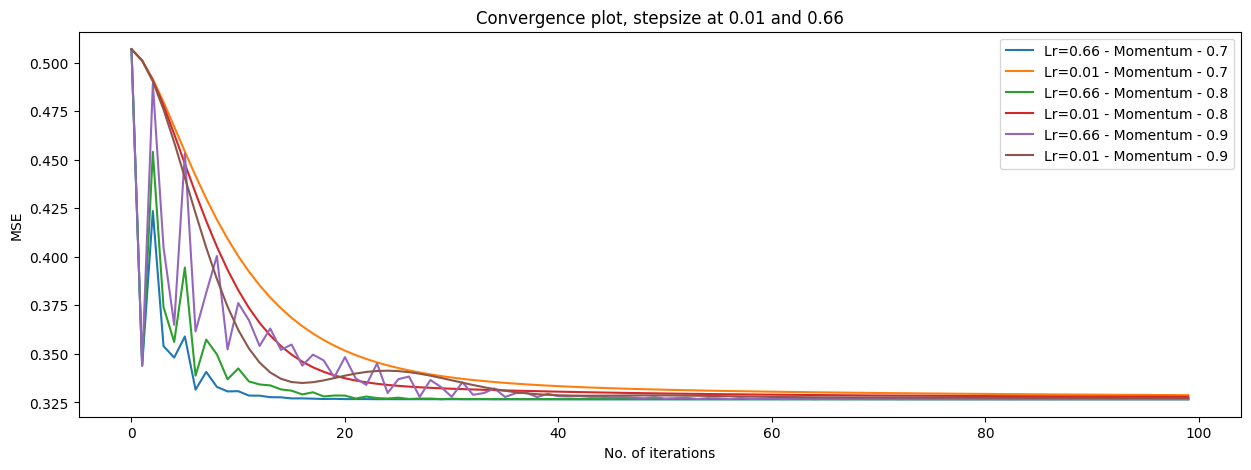

In [23]:
plt.figure(figsize=(15, 5))
x0 = np.zeros((p))
beta_mult = [ 0.7, 0.8, 0.9]
for beta in beta_mult:
    final_x , loss = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.66)
    plt.plot(loss, label='Lr=0.66 - Momentum - ' +str(beta))
    final_x , loss = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.01)
    plt.plot(loss, label='Lr=0.01 - Momentum - ' +str(beta))
plt.title('Convergence plot, stepsize at 0.01 and 0.66')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

It seems that for a fix step size of 0.01, a value of 0.8 and 0.9 are leading to the best result. Let's try the same test with different step size, keeping multiple value of beta. If the result is still the same, we will go for experiment to find the best stepsize.

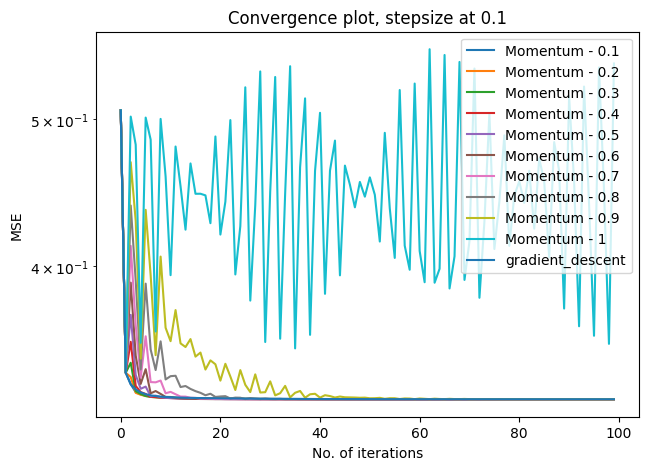

In [11]:
plt.figure(figsize=(7, 5))
x0 = np.zeros((p))
beta_mult = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for beta in beta_mult:
    final_x , loss = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.1)
    plt.semilogy(loss, label='Momentum - ' +str(beta))
final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.1)
plt.semilogy(loss, label='gradient_descent')
plt.title('Convergence plot, stepsize at 0.1')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

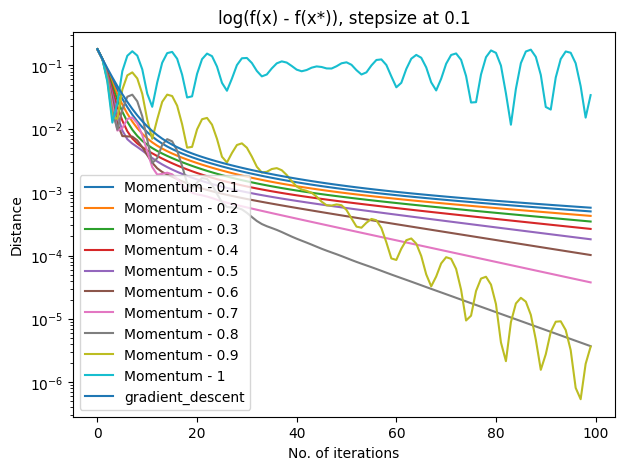

In [30]:
plt.figure(figsize=(7, 5))
x0 = np.zeros((p))
beta_mult = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for beta in beta_mult:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.1)
    plt.semilogy(dist, label='Momentum - ' +str(beta))
final_x , loss, dist = gradient_descent(x0, A_train , Y_train, learning_rate=0.1)
plt.semilogy(dist, label='gradient_descent')
plt.title('log(f(x) - f(x*)), stepsize at 0.1')
plt.xlabel('No. of iterations')
plt.ylabel('Distance')
plt.legend()
plt.show()

In the case of stepsize at 0.1, we have more oscillation in the result for beta equals 1 to 0.6. So we can say that the best result is 0.5 or 0.6 (as the oscillation vanish quickly) in terms of convergence. Finaly we can make a new assuption : Alpha (stepsize) bigger, implies beta lower.
We can try to keep the best of the 2 past experimentation to see wich convergence is the best.

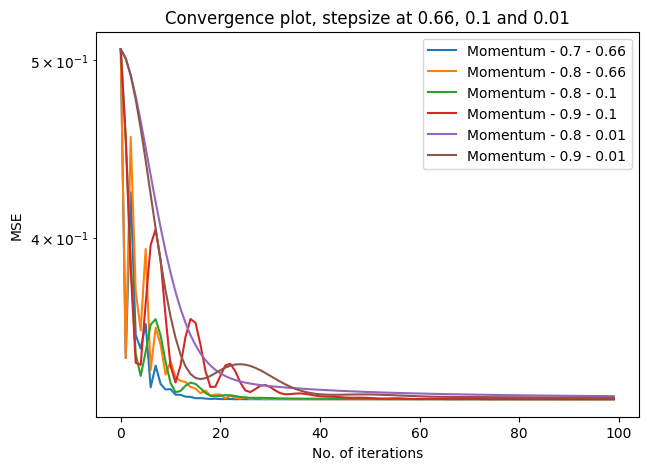

In [32]:
plt.figure(figsize=(7, 5))
x0 = np.zeros((p))
beta_mult_066 = [ 0.7, 0.8] #stepsize at 0.1
beta_mult_01 = [ 0.8, 0.9] #stepsize at 0.1
beta_mult_001 = [0.8, 0.9 ] #stepsize at 0.001
#stepsize at 0.6 (was the best optimal step size in part1)

for beta in beta_mult_066:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.66)
    plt.semilogy(loss, label='Momentum - ' +str(beta) +' - '+str(0.66))
#final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.66)
#plt.semilogy(loss, label='gradient_descent at 0.66')
#stepsize at 0.1
for beta in beta_mult_01:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.1)
    plt.semilogy(loss, label='Momentum - ' +str(beta) +' - '+str(0.1))
#final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.1)
#plt.semilogy(loss, label='gradient_descent at 0.1')
#stepsize at 0.01
for beta in beta_mult_001:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.01)
    plt.semilogy(loss, label='Momentum - ' +str(beta) +' - ' +str(0.01))
#final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.01)
#plt.semilogy(loss, label='gradient_descent at 0.01')

plt.title('Convergence plot, stepsize at 0.66, 0.1 and 0.01')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

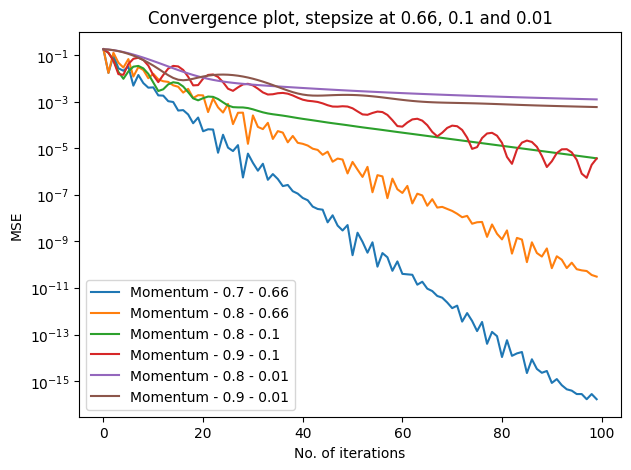

In [33]:
plt.figure(figsize=(7, 5))
x0 = np.zeros((p))
beta_mult_066 = [ 0.7, 0.8] #stepsize at 0.1
beta_mult_01 = [ 0.8, 0.9] #stepsize at 0.1
beta_mult_001 = [0.8, 0.9 ] #stepsize at 0.001
#stepsize at 0.6 (was the best optimal step size in part1)

for beta in beta_mult_066:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.66)
    plt.semilogy(dist, label='Momentum - ' +str(beta) +' - '+str(0.66))
#final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.66)
#plt.semilogy(loss, label='gradient_descent at 0.66')
#stepsize at 0.1
for beta in beta_mult_01:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.1)
    plt.semilogy(dist, label='Momentum - ' +str(beta) +' - '+str(0.1))
#final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.1)
#plt.semilogy(loss, label='gradient_descent at 0.1')
#stepsize at 0.01
for beta in beta_mult_001:
    final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.01)
    plt.semilogy(dist, label='Momentum - ' +str(beta) +' - ' +str(0.01))
#final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.01)
#plt.semilogy(loss, label='gradient_descent at 0.01')

plt.title('Convergence plot, stepsize at 0.66, 0.1 and 0.01')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

Those results are similars to part 1, so the stepsize is more inluent on the result than beta. Finally let's find the best stepsize and then will pick the best beta.

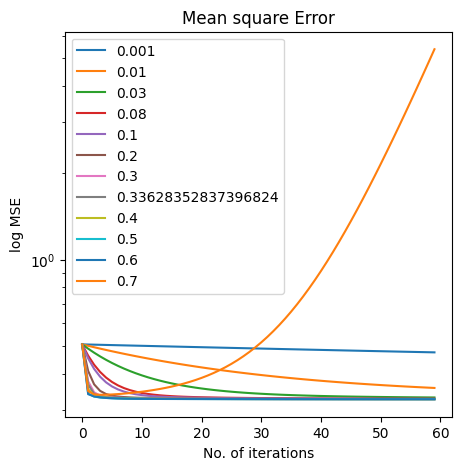

In [8]:
L = norm(A_train, ord=2) ** 2 / n + 1. / n ** (0.5)

tau_mult = [0.001, 0.01, 0.03, 0.08, .1, .2, .3, 1/L ,.4, .5, .6, .7] #different value of step size 


plt.figure(figsize=(5, 5))
for tau in tau_mult:
    x0 = np.zeros((p))
    final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=tau)
    plt.semilogy(loss, label=str(tau))

plt.title('Mean square Error')
plt.xlabel('No. of iterations')
plt.ylabel('log MSE')
plt.legend()
plt.show()

We have the best result for a stepsize equals to 0.6. Let's find the best beat now :

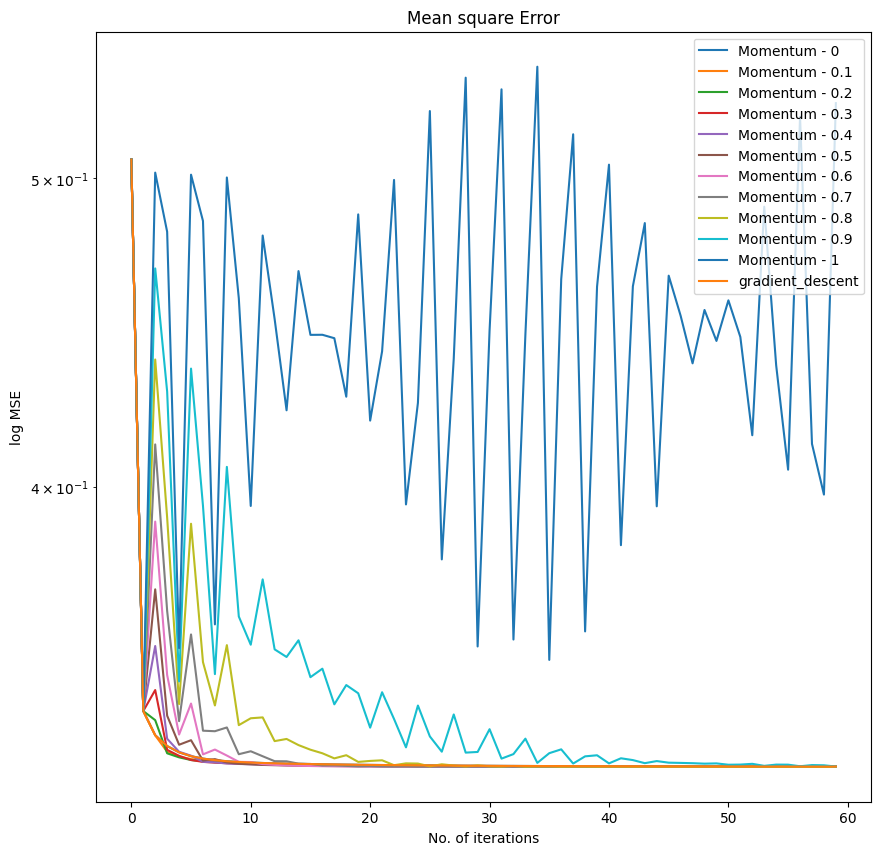

In [9]:
beta_mult = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] #stepsize at 0.6
plt.figure(figsize=(10, 10))
for beta in beta_mult:
    final_x , loss = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.6)
    plt.semilogy(loss, label='Momentum - ' +str(beta))
final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.6)
plt.semilogy(loss, label='gradient_descent')

plt.title('Mean square Error')
plt.xlabel('No. of iterations')
plt.ylabel('log MSE')
plt.legend()
plt.show()

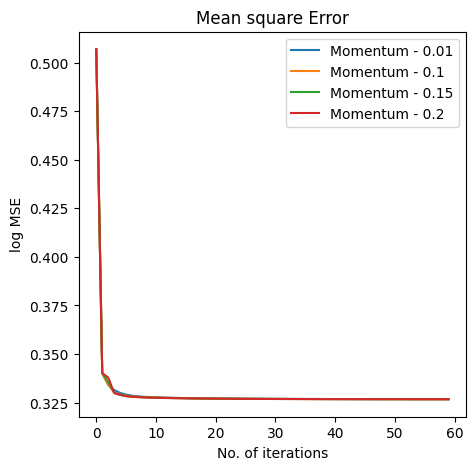

In [10]:
beta_mult = [ 0.01, 0.1,0.15, 0.2] #stepsize at 0.6
plt.figure(figsize=(5, 5))
for beta in beta_mult:
    final_x , loss = HeavyBall(x0, A_train , Y_train, beta=beta, learning_rate=0.6)
    plt.plot(loss, label='Momentum - ' +str(beta))
#final_x , loss = gradient_descent(x0, A_train , Y_train, learning_rate=0.6)
#plt.plot(loss, label='gradient_descent')

plt.title('Mean square Error')
plt.xlabel('No. of iterations')
plt.ylabel('log MSE')
plt.legend()
plt.show()

At this level of optimality, with alpha equals 0.6, the best beta is 0.1 in term of convergence

Question 2 :

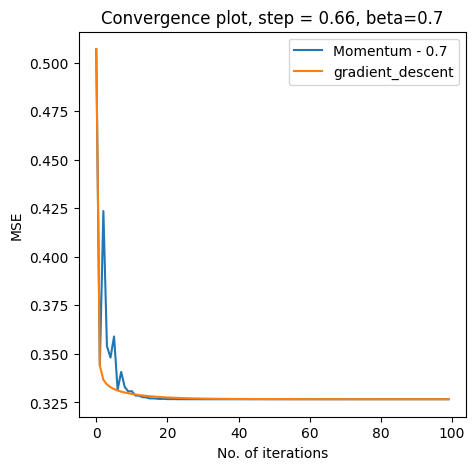

In [35]:

plt.figure(figsize=(5, 5))

final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=0.7, learning_rate=0.66, iterations = 100)
plt.plot(loss, label='Momentum - 0.7')
final_x , loss,dist = gradient_descent(x0, A_train , Y_train, learning_rate=0.66, iterations = 100)
plt.plot(loss, label='gradient_descent')

plt.title('Convergence plot, step = 0.66, beta=0.7')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()

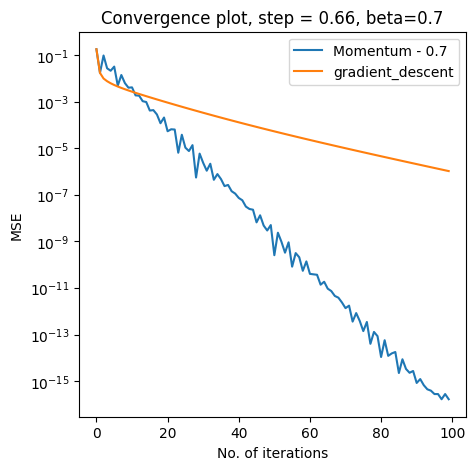

In [37]:
plt.figure(figsize=(5, 5))

final_x , loss, dist = HeavyBall(x0, A_train , Y_train, beta=0.7, learning_rate=0.66, iterations = 100)
plt.semilogy(dist, label='Momentum - 0.7')
final_x , loss,dist = gradient_descent(x0, A_train , Y_train, learning_rate=0.66, iterations = 100)
plt.semilogy(dist, label='gradient_descent')

plt.title('Convergence plot, step = 0.66, beta=0.7')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()

The results seems almost fully identical. Momentum is a little bit better around 5 iteration, otherwise it's totally the same.  

Question 3 to do

In [51]:
def gradient_descent_non_cvx(x0, A, y, Lambda,iterations = 100, learning_rate = 0.01, stopping_threshold = 1e-6):

    # Initializing learning rate and iterations
    losses = [] #to return 
    vector=x0 #starting point
    n = X_train.shape[0] #nb of data point
    # Estimation of optimal parameters
    for _ in range(iterations):
        # Calculating a new prediction
        prediction = A.dot(vector)
        #mean square error
        error = y - prediction 
        loss = (1/(2*n))*(np.dot(error.T,error)) + (Lambda * norm(vector,0.5))
        losses.append(loss)

        #calcultating gradient
        grad = -(A.transpose().dot(error))/n - Lambda *((abs(vector)/norm(vector,0.5))**(-0.5))*np.sign(vector)
        #gradient descent step
        vector = vector - (learning_rate * grad)


        if norm(grad)/norm(A)<1e-5 :
            print("for lambda = "+ str(Lambda))
            print(_, " first order optimal")
            break
        # Printing the mse for each iteration
        #print(f"Iteration {i+1}: Cost {mse}")

    return vector, losses

for lambda = 0.001098901098901099
1456  first order optimal
for lambda = 0.006035579235710375
1737  first order optimal
for lambda = 0.010648924267509345
1754  first order optimal
for lambda = 0.033149677206589796
1337  first order optimal


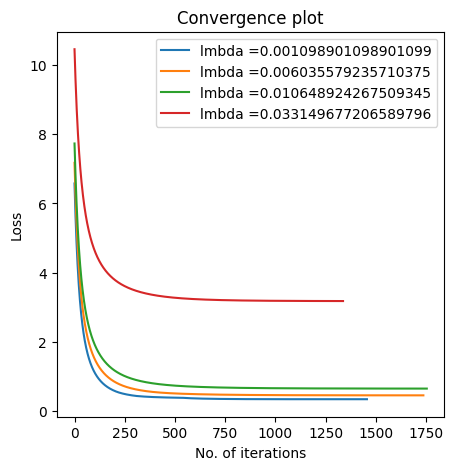

In [55]:
puiss_Lambda_mult = [1,  3/4, 2/3, 1/2]
#puiss_Lambda_mult = [1]
n,p = X_train.shape

plt.figure(figsize=(5, 5))
for puiss_Lambda in puiss_Lambda_mult:
    x0 = np.ones(p)
    vector , loss = gradient_descent_non_cvx(x0, A_train , Y_train, 1/n**puiss_Lambda, iterations =10000)
    #print("For lambda equals to "+ str(1/n**puiss_Lambda))
    #print(vector)
    plt.plot(loss, label='lmbda ='+str(1/n**puiss_Lambda))

plt.title('Convergence plot')
plt.xlabel('No. of iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
A_test = X_test.to_numpy() #training matrix
Y_test = y_test.to_numpy() #label matrix
n = X_test.shape[0] #nb of data point
plt.figure(figsize=(5, 5))
loss=[]

#vector , _ = gradient_descent_ridge(x0, A_train , Y_train, Lambda, learning_rate=0.1)
error = A_test.dot(vector)
mse = (1/n)*(np.dot(error.T,error))
print(mse)

0.3035062023887811


<Figure size 500x500 with 0 Axes>